In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn import metrics


In [ ]:
#save state for unique results
save_state=18212178

In [ ]:

#change price to log price
url = 'https://raw.githubusercontent.com/ra9xx/sem1Capstone/main/AB_NYC_2019.csv'
nycData = pd.read_csv(url)
#nycData=pd.read_csv('AB_NYC_2019.csv')
print(nycData.head())
#add log price because price is heavily skewed 
nycData['logPrice']=np.log(nycData.price+1)
#drop unnecessary data
#neighbour way too many types
print(len(set(nycData['neighbourhood'])))
nycData.drop(['name','id','host_id','host_name','last_review','price','neighbourhood'],axis=1,inplace=True)
nycData3=nycData.copy()

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

Page 2: Inference question. Open this page with a qualitative (narrative, but specific) question.
Then, explain how you are – in principle – answering the question (e.g. “we’re comparing the
means of these two columns, implementing an A/B test”). After that, state the numerical
results and include a figure that illustrates the result. Note that no code is necessary here. Put
the code in the code appendix (which ideally consists of 3 sections that ideally correspond to
the analysis code for pages 2-4). End this page with a qualitative (narrative) answer that
interprets the quantitative results you obtained. To answer your question, you can use any
inference method we discussed in class (parametric tests, nonparametric tests, Bayesian
inference or resampling methods), but pick one. Make sure to comment on the usual metrics
of statistical inference (e.g. p-values, confidence, effect size, etc. – as suitable for the approach
you pick – e.g., if the approach is Bayesian inference, you need to comment on Bayes factors). 

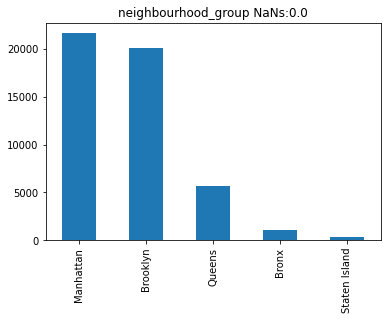

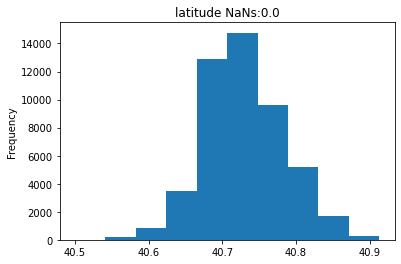

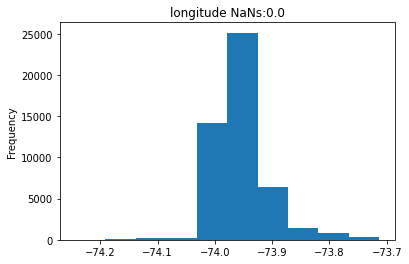

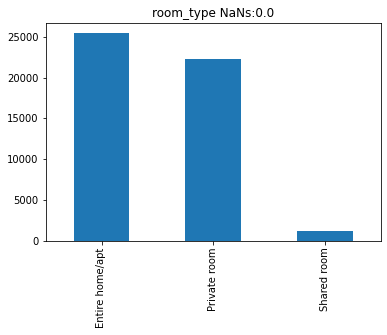

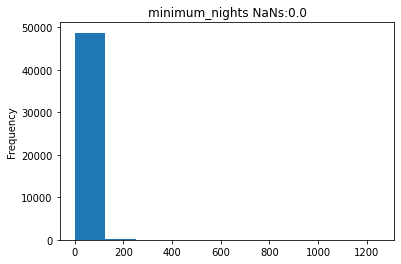

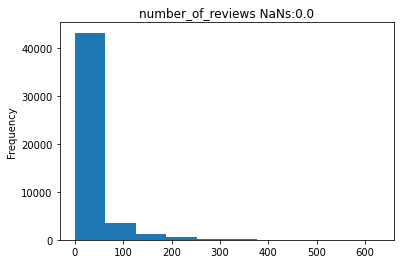

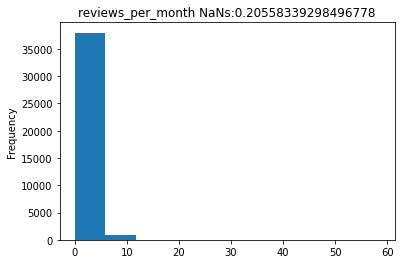

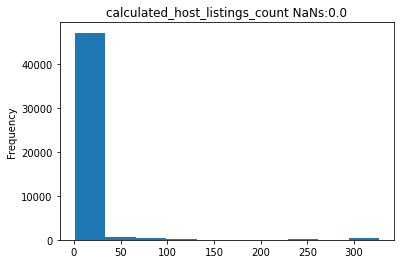

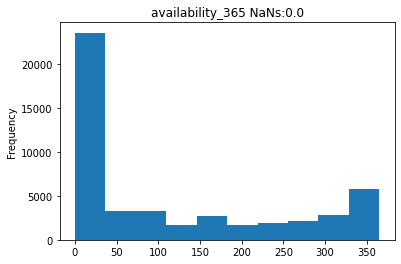

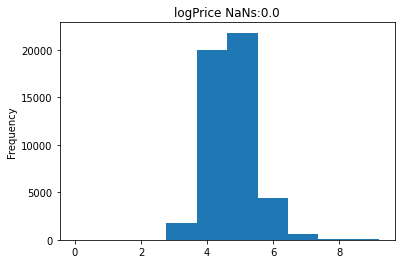

In [ ]:
#%% single variable analysis - distribution of each feature 
#subplot 2x2 to make these look better 
for col in nycData.columns:
    nas=nycData[col].isna().sum()/len(nycData)
    if nycData[col].dtypes=='object':
        fig=nycData[col].value_counts().plot(kind='bar',title=col+' NaNs:'+str(nas))
        #fig.get_figure().savefig('C:/Users/georg/Desktop/Single Variable analysis/'+col+'.png')
        time.sleep(0.1)
        plt.pause(0.0001) 
    elif nycData[col].dtypes=='float64' or nycData[col].dtypes=='int64':
        fig=nycData[col].plot(title=col+' NaNs:'+str(nas),kind='hist')
        #fig.get_figure().savefig('C:/Users/georg/Desktop/Single Variable analysis/'+col+'.png')
        time.sleep(0.1)
        plt.pause(0.0001) 

Text(0.5, 1.0, 'Correlation Matrix')

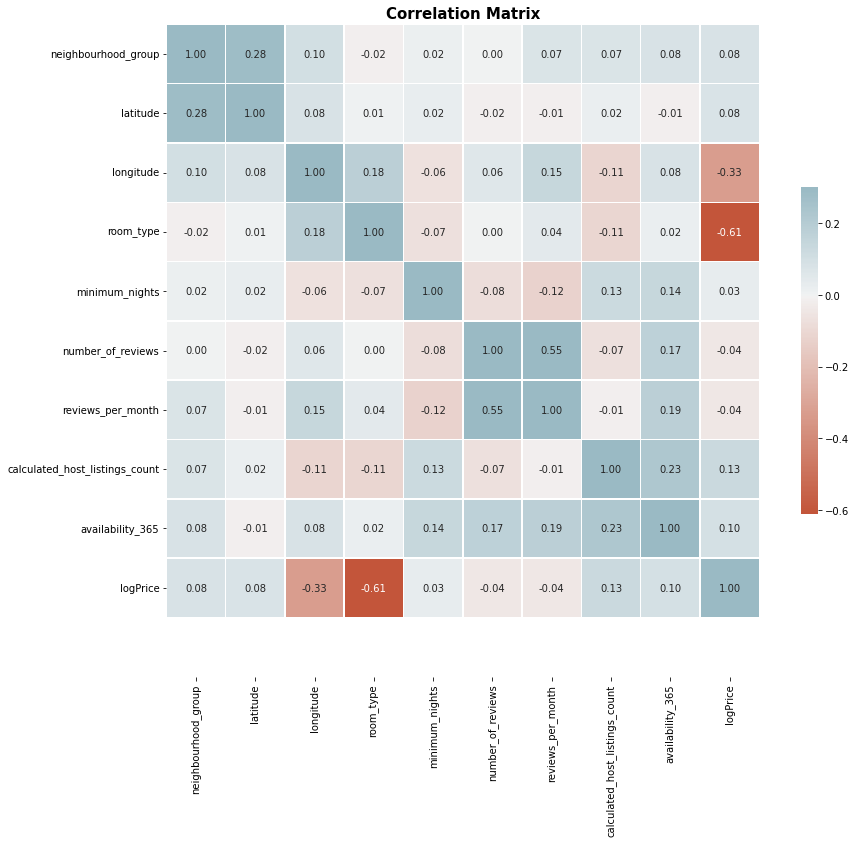

In [ ]:
#%% correlation plot
#s
nycData1=nycData.copy()

nycData1['neighbourhood_group']= nycData['neighbourhood_group'].astype("category").cat.codes
nycData1['room_type'] = nycData['room_type'].astype("category").cat.codes

plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=nycData1.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')


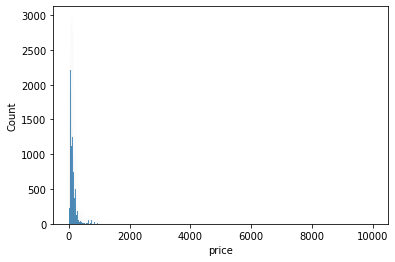

In [ ]:
#difference in distribution between log price and price 
url = 'https://raw.githubusercontent.com/ra9xx/sem1Capstone/main/AB_NYC_2019.csv'
nycDataPrice = pd.read_csv(url)
nycDataPrice['logPrice']=np.log(nycDataPrice['price']+1)
sns.histplot(nycDataPrice,x='price')


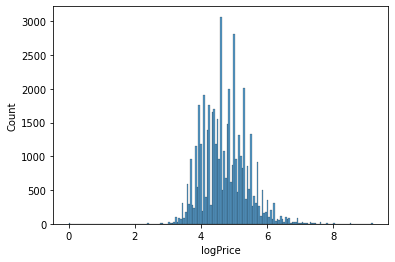

In [ ]:
sns.histplot(nycDataPrice,x='logPrice')

In [ ]:
# Look for variables that are correlated with both predictor variables and the target variable
conf_vars = []
for var in corr.columns:
    if (corr[var] > corr.mean().mean()).sum() > 1:
        conf_vars.append(var)

# Print the potential confounding variables
print(conf_vars)

['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'logPrice']


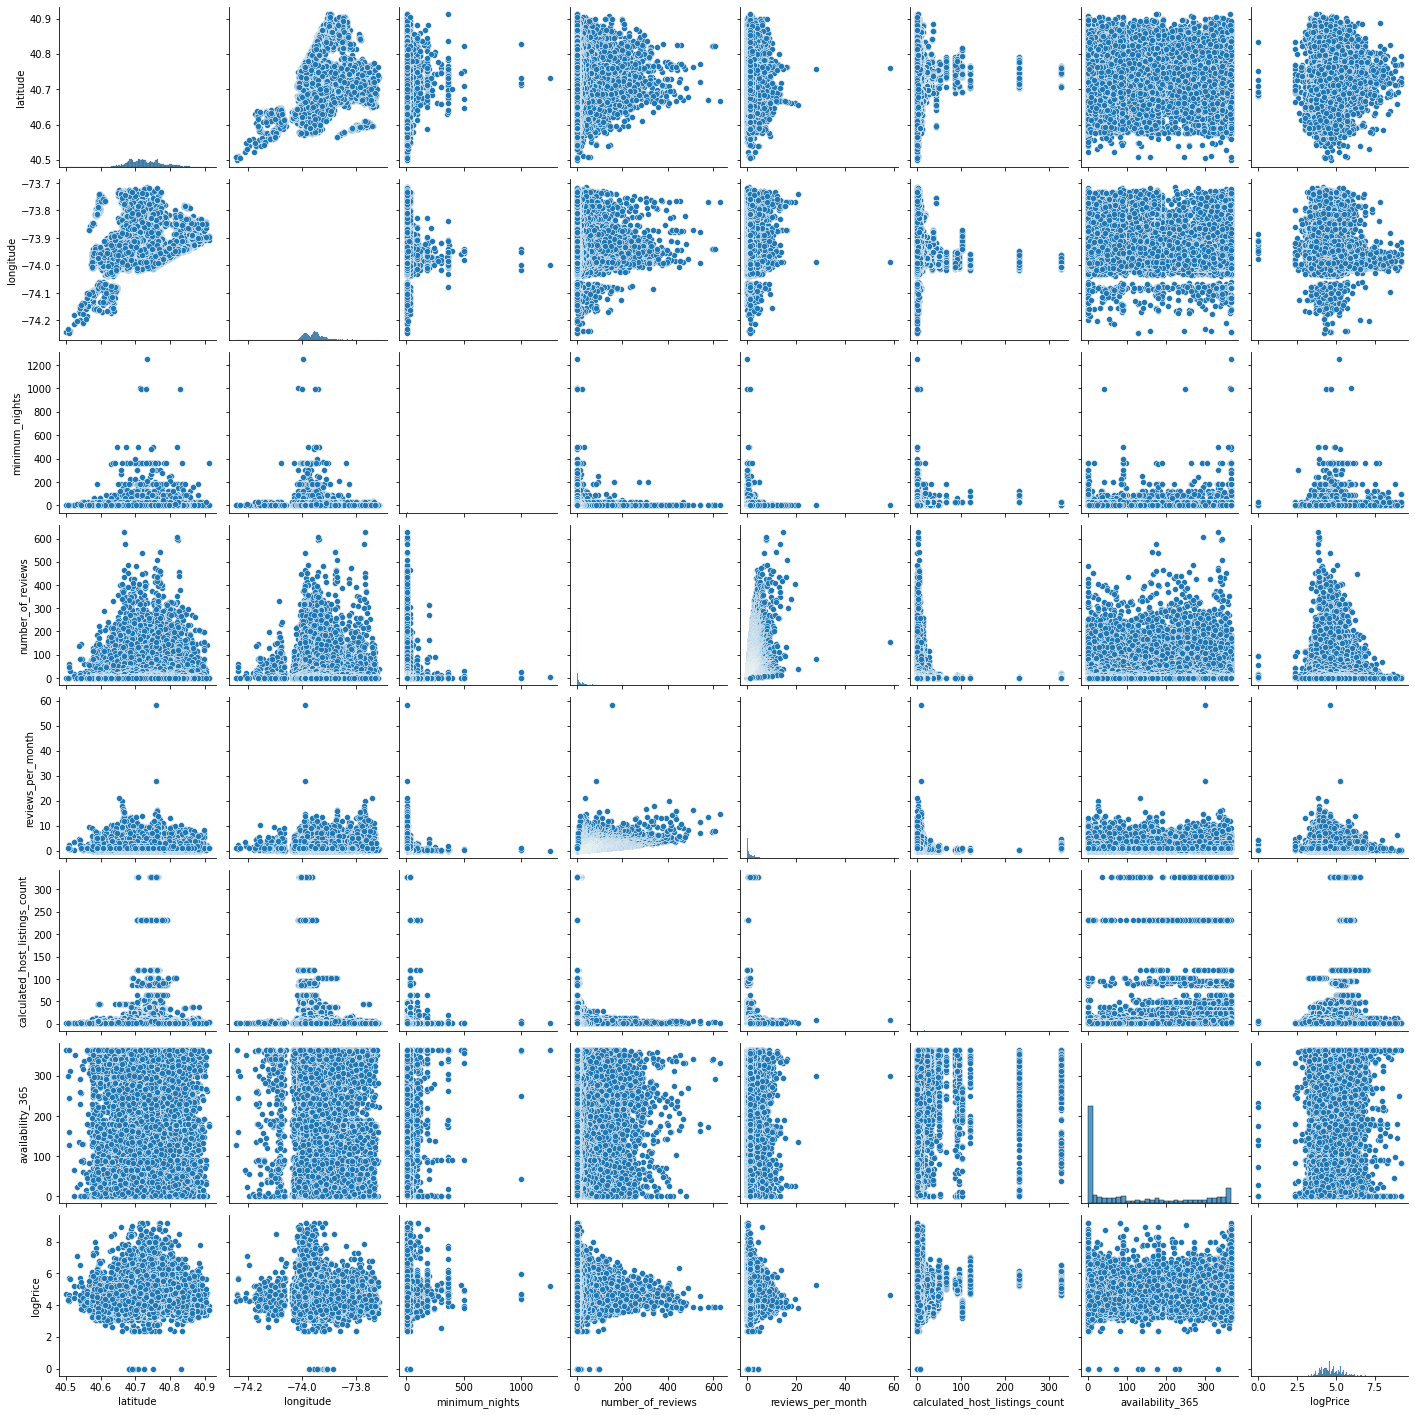

In [ ]:
sns.pairplot(nycData3)

('neighbourhood_group', 'latitude')
('neighbourhood_group', 'longitude')
('neighbourhood_group', 'room_type')


<Figure size 432x288 with 0 Axes>

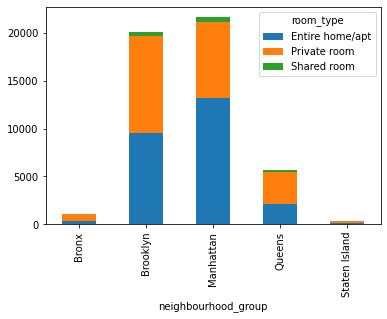

('neighbourhood_group', 'minimum_nights')
('neighbourhood_group', 'number_of_reviews')
('neighbourhood_group', 'reviews_per_month')
('neighbourhood_group', 'calculated_host_listings_count')
('neighbourhood_group', 'availability_365')
('neighbourhood_group', 'logPrice')
('latitude', 'longitude')
('latitude', 'room_type')
('latitude', 'minimum_nights')
('latitude', 'number_of_reviews')
('latitude', 'reviews_per_month')
('latitude', 'calculated_host_listings_count')
('latitude', 'availability_365')
('latitude', 'logPrice')
('longitude', 'room_type')
('longitude', 'minimum_nights')
('longitude', 'number_of_reviews')
('longitude', 'reviews_per_month')
('longitude', 'calculated_host_listings_count')
('longitude', 'availability_365')
('longitude', 'logPrice')
('room_type', 'minimum_nights')
('room_type', 'number_of_reviews')
('room_type', 'reviews_per_month')
('room_type', 'calculated_host_listings_count')
('room_type', 'availability_365')
('room_type', 'logPrice')
('minimum_nights', 'number_

<Figure size 432x288 with 0 Axes>

In [ ]:
#%% analysis between variables 
#
from itertools import combinations

for combo in combinations(nycData,2):
    print(combo)
    if all(nycData[[combo[0],combo[1]]].dtypes!='object'):
        pt=sns.scatterplot(data=nycData,x=combo[0],y=combo[1])
        pt1=pt.get_figure()
        #pt1.savefig('C:/Users/georg/Desktop/Multivariable Analysis/'+combo[0]+' vs '+combo[1]+'.png')
        time.sleep(0.1)
        pt1.clf()
    elif sum(nycData[[combo[0],combo[1]]].dtypes=='object')==1:
        pt=sns.boxplot(data=nycData,x=combo[0],y=combo[1])
        pt1=pt.get_figure()
        #pt1.savefig('C:/Users/georg/Desktop/Multivariable Analysis/'+combo[0]+' vs '+combo[1]+'.png')
        time.sleep(0.1)
        pt1.clf()
    else:
        x=nycData.groupby(['room_type','neighbourhood_group']).size().reset_index().pivot(index='neighbourhood_group',columns='room_type',values=0)
        fig=x.plot(kind='bar',stacked=True)
        #fig.get_figure().savefig('C:/Users/georg/Desktop/Multivariable Analysis/RoomType Vs Neighbourhood_group.png')
        time.sleep(0.1)
        plt.pause(0.0001)

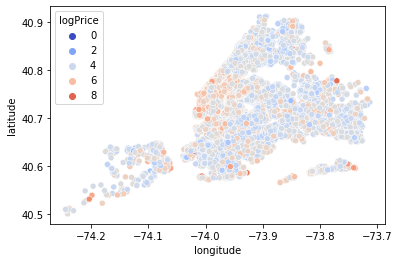

In [ ]:
#%% interesting graphs 
          #plot longitude and latitude, compared price based on region 
          #price was skewed so took log of price 
x=sns.scatterplot(data=nycData,x='longitude',y='latitude',hue='logPrice',palette="coolwarm")
#x.get_figure().savefig('C:/Users/georg/Desktop/Multivariable Analysis/Latitude vs Longitude and Price.png')

Page 3: Prediction question, otherwise structure like b). This will become more clear when we
do the ML part of the class, but here, use a supervised learning method that makes predictions
of some sort (multiple regression, regularized regression, some kind of NN, etc.). Basically ask
(and answer) a question of the form: “Does feature x predict outcomes y, while controlling for
confounds c1, c2 and c3”? Make sure to comment on the accuracy of the prediction by talking
about R2
, residuals or RMSE. 

                        Coefficient
logMinNights              -0.092370
logAvail365                0.054351
logNumRevs                -0.058635
longitude               1529.275058
latitude               -2783.588105
latLong                  -37.662857
room_type_Private room    -0.785889
room_type_Shared room     -1.190760
                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     4948.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:02:23   Log-Likelihood:                -27558.
No. Observations:               39116   AIC:                         5.513e+04
Df Residuals:                   39107   BIC:                         5.521e+04
Df Model:                           8       

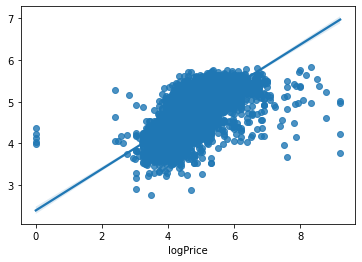

In [ ]:
#%% remove NaNs and feature engineering
#parameter for ridge and lasso 
alphas=np.linspace(.0001,100,1000)
nycData2=nycData3
nycData2['reviews_per_month']=nycData['reviews_per_month'].fillna(0)
nycData2['latLong']=nycData['latitude']*nycData['longitude']
nycData2['logMinNights']=np.log(nycData['minimum_nights'])
nycData2['logAvail365']=np.log(nycData['availability_365']+1)
nycData2['logNumRevs']=np.log(nycData['number_of_reviews']+1)


#%%#%% modeling for log price with feature engineering

xvars=['logMinNights',
       'logAvail365',
       'logNumRevs',
       'room_type', #dummy variables 
       'longitude',
       'latitude',
       'latLong']

X=pd.get_dummies(nycData2[xvars],drop_first=True)
y=nycData['logPrice']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=save_state)
model = LinearRegression(fit_intercept = True)
model.fit(X_train,y_train)


coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(coeff_parameter)
predictions = model.predict(X_test)
sns.regplot(y_test,predictions)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())



linear regression
0.49732643541174354
0.4941822831057694
ridge
0.5027596378148703
0.483069976620945
lasso
0.5094714034916402
0.4691759737393716


0.0001

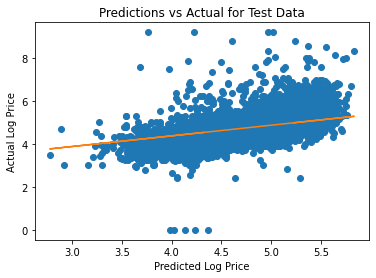

In [ ]:
#performance evaluation, comment on our R2 are not that high
print('linear regression')
print(np.sqrt(sum((y_test-predictions)**2)/len(y_test)))
print(r2_score(y_test,predictions))

#ridge
print('ridge')
ridgeModel=RidgeCV(alphas=alphas).fit(X_train,y_train)

predictionsRidge = ridgeModel.predict(X_test)

print(np.sqrt(sum((y_test-predictionsRidge)**2)/len(y_test)))
print(r2_score(y_test,predictionsRidge))

#lasso
lassoModel=LassoCV(alphas=alphas).fit(X_train,y_train)

predictionsLasso = lassoModel.predict(X_test)
print('lasso')
print(np.sqrt(sum((y_test-predictionsLasso)**2)/len(y_test)))
print(r2_score(y_test,predictionsLasso))

#plot for prediction and actual log price
plt.plot(predictions, y_test, 'o')
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(predictions, m*predictions+b)
plt.xlabel('Predicted Log Price')
plt.ylabel('Actual Log Price')
plt.title('Predictions vs Actual for Test Data')
ridgeModel.alpha_
lassoModel.alpha_

In [ ]:
ridgeModel.alpha_,lassoModel.alpha_

(0.0001, 0.0001)

Inference Section 

In [ ]:
#power analyss for kruskal wallace, please do it in R!! Thank you 


'''
library(MultNonParam)
library(tidyverse)
dat=read.csv('AB_NYC_2019.csv')
dat=dat %>% mutate(number_of_reviews=ifelse(is.na(number_of_reviews),0,number_of_reviews))
#overall 
amongBoroughsMedian=dat %>% 
  group_by(neighbourhood_group) %>% 
  summarise(x=median(number_of_reviews),n=n())
kwsamplesize(amongBoroughsMedian$x,distname = 'logistic',targetpower = .8)
#by private rooms 
amongBoroughsMedianPR=dat %>% 
  filter(room_type=='Private room') %>% 
  group_by(neighbourhood_group) %>% 
  summarise(x=median(number_of_reviews),n=n())
kwsamplesize(amongBoroughsMedianPR$x,distname = 'logistic',targetpower = .8)
#entire home/apt
amongBoroughsMedianEHA=dat %>% 
  filter(room_type=='Entire home/apt') %>% 
  group_by(neighbourhood_group) %>% 
  summarise(x=median(number_of_reviews),n=n())
kwsamplesize(amongBoroughsMedianEHA$x,distname = 'logistic',targetpower = .8)
#shared rooms
amongBoroughsMedianSR=dat %>% 
  filter(room_type=='Shared room') %>% 
  group_by(neighbourhood_group) %>% 
  summarise(x=median(number_of_reviews),n=n())
kwsamplesize(amongBoroughsMedianSR$x%>%unique(),distname = 'logistic',targetpower = .8)

'''

"\nlibrary(MultNonParam)\nlibrary(tidyverse)\ndat=read.csv('AB_NYC_2019.csv')\ndat=dat %>% mutate(number_of_reviews=ifelse(is.na(number_of_reviews),0,number_of_reviews))\n#overall \namongBoroughsMedian=dat %>% \n  group_by(neighbourhood_group) %>% \n  summarise(x=median(number_of_reviews),n=n())\nkwsamplesize(amongBoroughsMedian$x,distname = 'logistic',targetpower = .8)\n#by private rooms \namongBoroughsMedianPR=dat %>% \n  filter(room_type=='Private room') %>% \n  group_by(neighbourhood_group) %>% \n  summarise(x=median(number_of_reviews),n=n())\nkwsamplesize(amongBoroughsMedianPR$x,distname = 'logistic',targetpower = .8)\n#entire home/apt\namongBoroughsMedianEHA=dat %>% \n  filter(room_type=='Entire home/apt') %>% \n  group_by(neighbourhood_group) %>% \n  summarise(x=median(number_of_reviews),n=n())\nkwsamplesize(amongBoroughsMedianEHA$x,distname = 'logistic',targetpower = .8)\n#shared rooms\namongBoroughsMedianSR=dat %>% \n  filter(room_type=='Shared room') %>% \n  group_by(neighbou

In [ ]:
#%% kruskall wallace for inference question 

#%%
#number of reviews and borough, control for room type
nycData['number_of_reviews'].fillna(0,inplace=True)
from scipy import stats
dat=nycData[['neighbourhood_group','number_of_reviews']].pivot(columns='neighbourhood_group',values='number_of_reviews')
fvalue, pvalue =stats.kruskal(dat['Bronx'].dropna().to_numpy(),
                               dat['Brooklyn'].dropna().to_numpy(),
                               dat['Queens'].dropna().to_numpy(),
                               dat['Manhattan'].dropna().to_numpy(),
                               dat['Staten Island'].dropna().to_numpy())
print(fvalue, pvalue)
#control for room type 
print('Private room')
dat=nycData[nycData['room_type']=='Private room'][['neighbourhood_group','number_of_reviews']].pivot(columns='neighbourhood_group',values='number_of_reviews')
fvalue, pvalue =stats.kruskal(dat['Bronx'].dropna().to_numpy(),
                               dat['Brooklyn'].dropna().to_numpy(),
                               dat['Queens'].dropna().to_numpy(),
                               dat['Manhattan'].dropna().to_numpy(),
                               dat['Staten Island'].dropna().to_numpy())
print(fvalue, pvalue)
print('Entire home/apt')
dat=nycData[nycData['room_type']=='Entire home/apt'][['neighbourhood_group','number_of_reviews']].pivot(columns='neighbourhood_group',values='number_of_reviews')
fvalue, pvalue =stats.kruskal(dat['Bronx'].dropna().to_numpy(),
                               dat['Brooklyn'].dropna().to_numpy(),
                               dat['Queens'].dropna().to_numpy(),
                               dat['Manhattan'].dropna().to_numpy(),
                               dat['Staten Island'].dropna().to_numpy())
print(fvalue, pvalue)

print('Shared room')
dat=nycData[nycData['room_type']=='Shared room'][['neighbourhood_group','number_of_reviews']].pivot(columns='neighbourhood_group',values='number_of_reviews')
fvalue, pvalue=stats.kruskal(dat['Bronx'].dropna().to_numpy(),
                               dat['Brooklyn'].dropna().to_numpy(),
                               dat['Queens'].dropna().to_numpy(),
                               dat['Manhattan'].dropna().to_numpy(),
                               dat['Staten Island'].dropna().to_numpy())
print(fvalue, pvalue)


306.25367862882626 4.8499462650972e-65
Private room
81.54678275962353 8.189188167137489e-17
Entire home/apt
626.0252738759813 3.608162908972784e-134
Shared room
20.488216961027312 0.00039991274199812504


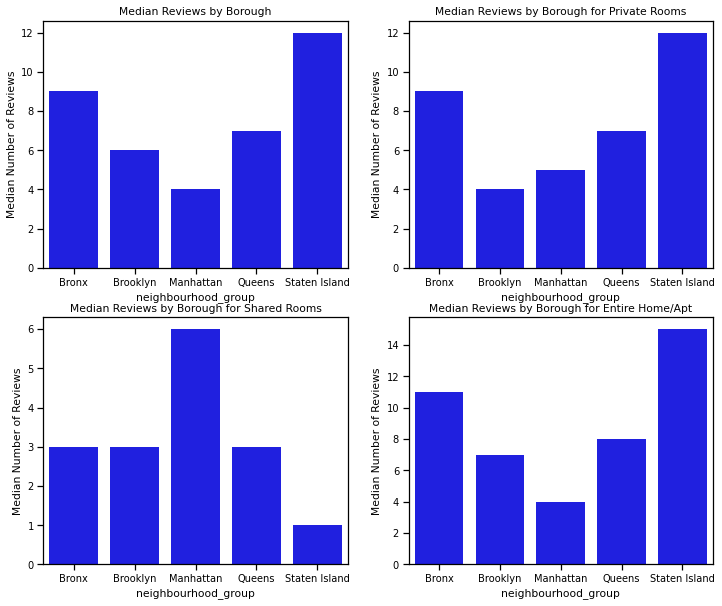

In [ ]:
medReviews=nycData.groupby(['neighbourhood_group'])['number_of_reviews'].median().reset_index().rename(columns={'number_of_reviews':'Median Number of Reviews'})

medReviewsPR=nycData[nycData['room_type']=='Private room'].groupby(['neighbourhood_group'])['number_of_reviews'].median().reset_index().rename(columns={'number_of_reviews':'Median Number of Reviews'})
medReviewsSR=nycData[nycData['room_type']=='Shared room'].groupby(['neighbourhood_group'])['number_of_reviews'].median().reset_index().rename(columns={'number_of_reviews':'Median Number of Reviews'})
medReviewsEHA=nycData[nycData['room_type']=='Entire home/apt'].groupby(['neighbourhood_group'])['number_of_reviews'].median().reset_index().rename(columns={'number_of_reviews':'Median Number of Reviews'})
#%%
with sns.plotting_context("notebook", font_scale=.9):
    fig, axes = plt.subplots(2,2, figsize=(12,10))
    sns.barplot(ax=axes[0,0],x=medReviews.neighbourhood_group,y=medReviews['Median Number of Reviews'],color='blue').set(title='Median Reviews by Borough')
    sns.barplot(ax=axes[0,1],x=medReviewsPR.neighbourhood_group,y=medReviewsPR['Median Number of Reviews'],color='blue').set(title='Median Reviews by Borough for Private Rooms')

    sns.barplot(ax=axes[1,0],x=medReviewsSR.neighbourhood_group,y=medReviewsSR['Median Number of Reviews'],color='blue').set(title='Median Reviews by Borough for Shared Rooms')

    sns.barplot(ax=axes[1,1],x=medReviewsEHA.neighbourhood_group,y=medReviewsEHA['Median Number of Reviews'],color='blue').set(title='Median Reviews by Borough for Entire Home/Apt')

Page 4: Classification question, same structure as in b). Again, this will become more clear
once we do ML, but we would like you to ask a classification question, and then use this data
and a classification algorithm (e.g. trees or forests or boosting) to answer it. Make sure to
also do include some kind of clustering algorithm before doing the classification. Also make
sure to include some kind of assessment tool to judge the quality of the classification (e.g.
ROC or P/R curves). 

In [ ]:
#classification 
url = 'https://raw.githubusercontent.com/ra9xx/sem1Capstone/main/AB_NYC_2019.csv'
nycData = pd.read_csv(url)
print(nycData.head())
#add log price because price is heavily skewed 
nycData['logPrice']=np.log(nycData.price+1)

#drop unnecessary data
#neighbour way too many types
nycData.drop(['name','id','host_id','host_name','price','last_review'],axis=1,inplace=True)

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#code to bootstrap 
nycData['Manhattan']=nycData['neighbourhood_group']=='Manhattan'
len(nycData.index)

manhattan=nycData[nycData['Manhattan']==True]
noManhattan=nycData[nycData['Manhattan']==False]

#bootstrap, equal number of manhattan and not manhattan
manhattanBS=manhattan.sample(n=len(nycData)//2,replace=True,random_state=1)
noManhattanBS=noManhattan.sample(n=len(nycData)//2,replace=True,random_state=1)
nycDataBS=pd.concat([manhattanBS,noManhattanBS])

[Text(0.5, 1.0, '# of Properties by Hosts with Multiple Properties by Borough')]

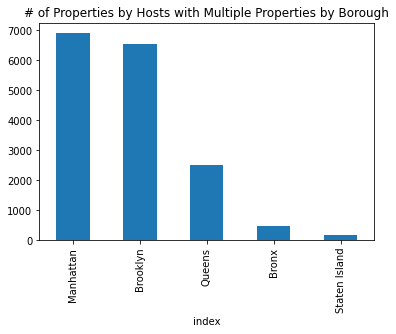

In [ ]:
#hosts who own multiple units, most of them are in manhattan
nycData[nycData['calculated_host_listings_count']>1]['neighbourhood_group'].value_counts().reset_index().plot.bar(x='index',legend=False).set(title='# of Properties by Hosts with Multiple Properties by Borough')

In [ ]:
#classification, naive bayes
nycBayes=nycData.copy()
nycBayes['Manhattan']=nycBayes['neighbourhood_group']=='Manhattan'
nycBayes["reviews_per_month"]=nycBayes["reviews_per_month"].fillna(value=0)
nycBayes=nycBayes.drop(columns=["longitude","latitude",'neighbourhood_group'])
nycBayes["weighted_pop"]=nycBayes["number_of_reviews"].apply(lambda x : 1 if x<10 else 2).astype(int)
nycBayes["weighted_pop"]=nycBayes["weighted_pop"]* nycBayes["minimum_nights"]
nycBayes

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,logPrice,Manhattan,weighted_pop
0,Kensington,Private room,1,9,0.21,6,365,5.010635,False,1
1,Midtown,Entire home/apt,1,45,0.38,2,355,5.420535,True,2
2,Harlem,Private room,3,0,0.00,1,365,5.017280,True,3
3,Clinton Hill,Entire home/apt,1,270,4.64,1,194,4.499810,False,2
4,East Harlem,Entire home/apt,10,9,0.10,1,0,4.394449,True,10
...,...,...,...,...,...,...,...,...,...,...
48890,Bedford-Stuyvesant,Private room,2,0,0.00,2,9,4.262680,False,2
48891,Bushwick,Private room,4,0,0.00,2,36,3.713572,False,4
48892,Harlem,Entire home/apt,10,0,0.00,1,27,4.753590,True,10
48893,Hell's Kitchen,Shared room,1,0,0.00,6,2,4.025352,True,1


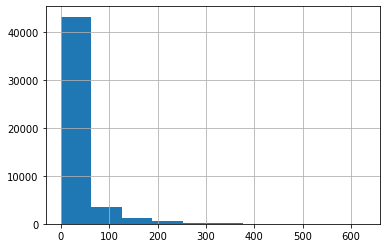

In [ ]:
nycBayes["number_of_reviews"].hist()

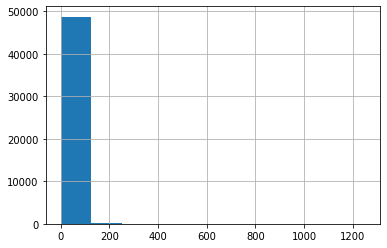

In [ ]:
nycBayes["minimum_nights"].hist()

(array([12720., 11696., 11302.,  3034.,  2810.,   130.,   563.,    33.,
          145.,   841.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

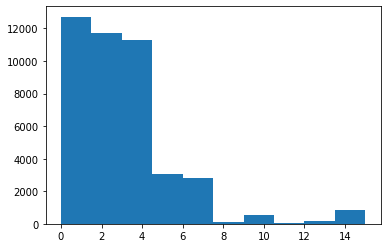

In [ ]:
plt.hist(nycBayes["minimum_nights"], range=[0,15])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
save_state=18212178
meanFPRNB = np.linspace(0,1,100)
tprsNB = []
scorelistNB = []

for i in range(1000):
  manhattan=nycBayes[nycBayes['Manhattan']==True]
  noManhattan=nycBayes[nycBayes['Manhattan']==False]
  manhattanBS=manhattan.sample(n=len(nycBayes)//2,replace=True,random_state=i)
  noManhattanBS=noManhattan.sample(n=len(nycBayes)//2,replace=True,random_state=i)
  nycDataBS=pd.concat([manhattanBS,noManhattanBS])
  X=nycDataBS.drop(columns=["Manhattan"])
  X=pd.get_dummies(X)
  y=nycDataBS["Manhattan"]
  y=y.astype(int)
  # clf = MultinomialNB()
  clf=GaussianNB()
  # clf=CategoricalNB()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=save_state)
  clf.fit(X_train, y_train)
  y_pred=clf.predict_proba(X_test)
  fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred[:,1])
  tprsNB.append(np.interp(meanFPRNB, fpr, tpr))
  #roc_auc = metrics.auc(fpr, tpr)
  #scorelist.append(roc_auc_score(y_test, y_pred))

0.6719991790385588

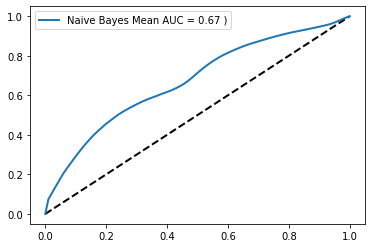

In [ ]:
meanTPRNB = np.mean(tprsNB, axis=0)
meanAUCNB = metrics.auc(meanFPRNB, meanTPRNB)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
plt.plot(meanFPRNB, meanTPRNB, label='Naive Bayes'+r' Mean AUC = %0.2f )' % (meanAUCNB),lw=2, alpha=1)
plt.legend()

meanAUCNB

**Decision Tree**

Some preprocessing

In [ ]:
nycData['Manhattan']=nycData['neighbourhood_group']=='Manhattan'
len(nycData.index)

manhattan=nycData[nycData['Manhattan']==True]
noManhattan=nycData[nycData['Manhattan']==False]

#bootstrap, equal number of manhattan and not manhattan
manhattanBS=manhattan.sample(n=len(nycData)//2,replace=True,random_state=1)
noManhattanBS=noManhattan.sample(n=len(nycData)//2,replace=True,random_state=1)
nycDataBS=pd.concat([manhattanBS, noManhattanBS])

save_state=18212178

In [ ]:
nycDecisionTree=nycData.copy()
nycDecisionTree['Manhattan']=nycDecisionTree['neighbourhood_group']=='Manhattan'
nycDecisionTree["reviews_per_month"]=nycDecisionTree["reviews_per_month"].fillna(value=0)
nycDecisionTree=nycDecisionTree.drop(columns=["longitude","latitude","neighbourhood_group"])
nycDecisionTree['Manhattan']=np.where(nycDecisionTree['Manhattan']==True, 1, 0)

In [ ]:
nycDecisionTree['Manhattan']=np.where(nycDecisionTree['Manhattan']==True, 1, 0)

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import sklearn.metrics as metrics

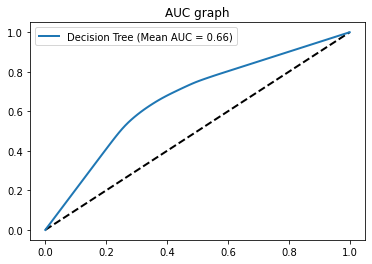

In [ ]:
#decision tree
#https://datagy.io/sklearn-decision-tree-classifier/
#dt=nycDataBS[['minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','logPrice']]
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# One-hot encoding our data
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import plot_tree # tree diagram
from matplotlib import rcParams # figure size

#column_transformer = make_column_transformer(
#    (OneHotEncoder(), ['room_type','neighbourhood_group','neighbourhood']),
#    remainder='passthrough')

meanFPR=np.linspace(0,1,100)

accuracy_score=[]
auc_score=[]
tprs=[]
feature_importance=[]
for i in range(0,1000):
    #bootstrapping
    manhattan=nycDecisionTree[nycDecisionTree['Manhattan']==1]
    noManhattan=nycDecisionTree[nycDecisionTree['Manhattan']==0]
    manhattanBS=manhattan.sample(n=len(nycDecisionTree)//2,replace=True,random_state=i)
    noManhattanBS=noManhattan.sample(n=len(nycDecisionTree)//2,replace=True,random_state=i)
    nycDataBS=pd.concat([manhattanBS,noManhattanBS])

    #independent variable 
    X=nycDataBS.drop(columns=["Manhattan"])
    X=pd.get_dummies(X)
    
    #target (dependent) variable 
    y=nycDataBS["Manhattan"]
    y=y.astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state = save_state)

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features=0.6, splitter='best')
    # Train Decision Tree Classifer
    clf.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred=clf.predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    feature_importance.append(clf.feature_importances_)
    tprs.append(np.interp(meanFPR, fpr, tpr))
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
    auc_score.append(metrics.roc_auc_score(y_test,y_pred))
    
meanTPR = np.mean(tprs, axis=0)
meanAUC = metrics.auc(meanFPR, meanTPR)
    
plt.plot([0,1],[0,1],'r--',lw=2,color='black')
plt.plot(meanFPR, meanTPR, label='Decision Tree 'r'(Mean AUC = %0.2f)' % (meanAUC),lw=2,alpha=1)
plt.title('AUC graph')
plt.legend()
plt.show()


In [ ]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# Install libraries
#!pip install dtreeviz
#!pip install graphviz
#from dtreeviz.trees import *
#from sklearn import preprocessing
from sklearn import tree
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

feature_names=list(X.columns) 

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_217 <= 0.50
|   |--- feature_19 <= 0.50
|   |   |--- feature_5 <= 4.49
|   |   |   |--- feature_99 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_99 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  4.49
|   |   |   |--- feature_57 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_57 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_19 >  0.50
|   |   |--- class: 0
|--- feature_217 >  0.50
|   |--- class: 0



In [ ]:
#Decision Tree
#calculate area under the curve 
a, b, threshold = metrics.roc_curve(y_test, y_pred)
dt_roc_auc = metrics.auc(a, b)

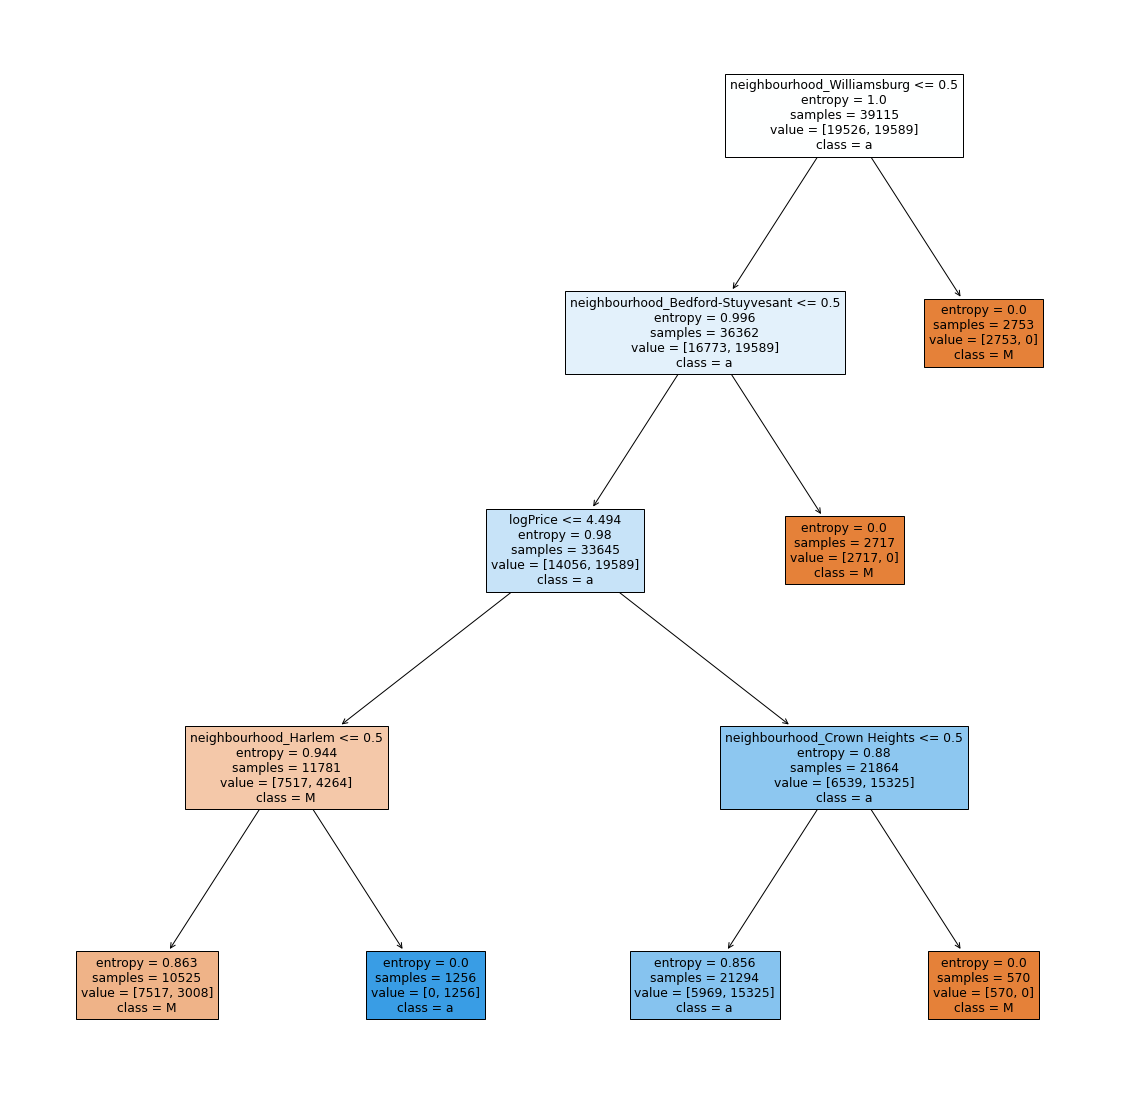

In [ ]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,
                   class_names = 'Manhattan',
                   filled=True)

Plot has too many branches, do pruning to cut down some

Clustering 

In [ ]:
from sklearn.cluster import KMeans
data_kmeans = pd.read_csv(url)
room_type_encoded = pd.get_dummies(data_kmeans["room_type"], prefix="room_type")

# Concatenate the encoded room type data with the original data
data_kmeans = pd.concat([data_kmeans, room_type_encoded], axis=1)
data_kmeans['logPrice']=np.log(data_kmeans.price+1)

X_kmeans = data_kmeans[["room_type_Entire home/apt", "room_type_Private room", "room_type_Shared room", "price", "number_of_reviews", "availability_365"]]

#data_kmeans.head(10)

wcss1 = []
wcss2 = []

# Loop through a range of possible values for k
for k in range(1, 11):
  # Run the k-means algorithm with the current value of k

  kmeans1 = KMeans(n_clusters=k)
  kmeans2 = KMeans(n_clusters=k, algorithm = "elkan")
  kmeans1.fit(X_kmeans)
  kmeans2.fit(X_kmeans)
  #print(kmeans.cluster_centers_)
  
  # Calculate the WCSS for the current value of k
  wcss1.append(kmeans1.inertia_)
  wcss2.append(kmeans2.inertia_)



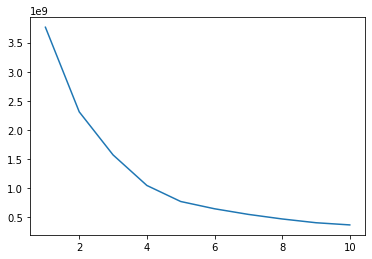

In [ ]:
# Plot the WCSS versus k
plt.plot(range(1, 11), wcss1)

# Show the plot
plt.show()


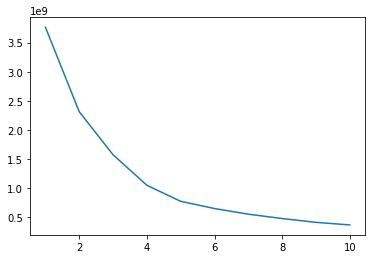

In [ ]:
# Plot the WCSS versus k
plt.plot(range(1, 11), wcss2)

# Show the plot
plt.show()


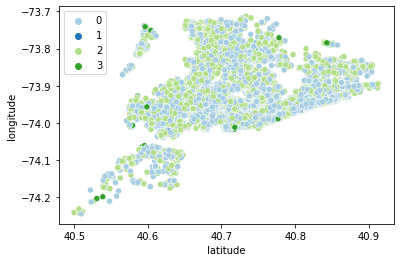

In [ ]:
kmeans1 = KMeans(n_clusters=4)
kmeans2 = KMeans(n_clusters=4, algorithm = "elkan")
kmeans1.fit(X_kmeans)
kmeans2.fit(X_kmeans)

sns.scatterplot(data=data_kmeans, x="longitude", y="latitude", hue=kmeans1.labels_, palette="Paired")

# Show the plot
plt.show()



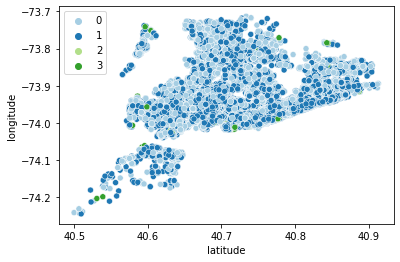

In [ ]:
sns.scatterplot(data=data_kmeans, x="longitude", y="latitude", hue=kmeans2.labels_, palette="Paired")

# Show the plot
plt.show()

In [ ]:
centers1 = kmeans1.cluster_centers_
centers2 = kmeans2.cluster_centers_
print("K-Means 1 Cluster Centers", centers1)
print("K-Means 2 Cluster Centers", centers2)

K-Means 1 Cluster Centers [[ 5.06829146e-01  4.73435248e-01  1.97356055e-02  1.25113307e+02
   1.77461312e+01  2.60580477e+01]
 [ 8.60465116e-01  1.39534884e-01 -3.46944695e-18  5.84586047e+03
   1.95348837e+00  1.90186047e+02]
 [ 5.26158259e-01  4.41292012e-01  3.25497288e-02  1.47043711e+02
   3.50326744e+01  2.81203841e+02]
 [ 8.45464726e-01  1.45576708e-01  8.95856663e-03  9.67412094e+02
   1.07614782e+01  1.84517357e+02]]
K-Means 2 Cluster Centers [[ 5.26158259e-01  4.41292012e-01  3.25497288e-02  1.47043711e+02
   3.50326744e+01  2.81203841e+02]
 [ 5.06829146e-01  4.73435248e-01  1.97356055e-02  1.25113307e+02
   1.77461312e+01  2.60580477e+01]
 [ 8.60465116e-01  1.39534884e-01 -3.46944695e-18  5.84586047e+03
   1.95348837e+00  1.90186047e+02]
 [ 8.45464726e-01  1.45576708e-01  8.95856663e-03  9.67412094e+02
   1.07614782e+01  1.84517357e+02]]


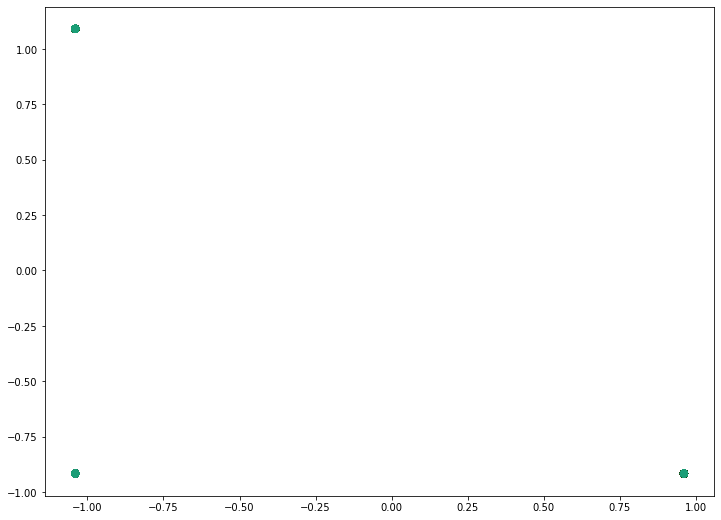

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


X_db = StandardScaler().fit_transform(X_kmeans)

# Run DBSCAN on the standardized data
dbscan = DBSCAN(eps=.2, min_samples=3)
clusters = dbscan.fit_predict(X_db)

# Extract the unique cluster labels


plt.figure(figsize=(12,9))

plt.scatter(X_db[:, 0], X_db[:, 1], c=clusters, s=50, cmap='Dark2')

**Logistic Regression Analysis**

In [ ]:
print(nycData3[nycData3['number_of_reviews']==0].shape)
print('# Nans in nycData3 reviews_per_month column:', nycData3['reviews_per_month'].isnull().values.sum())

# replace NaNs in reviews_per_month column 
nycData4 = nycData.copy()
nycData4['reviews_per_month'] = nycData4['reviews_per_month'].fillna(0)
nycData4['reviews_per_month']
print('# Nans in nycData4 reviews_per_month column:',nycData4['reviews_per_month'].isnull().values.sum())

(10052, 14)
# Nans in nycData3 reviews_per_month column: 0
# Nans in nycData4 reviews_per_month column: 0


In [ ]:
# remove latitude and longitude columns 
nycData4.drop(['latitude','longitude'],axis=1,inplace=True)
nycData4.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'logPrice',
       'Manhattan'],
      dtype='object')

In [ ]:
# create target for y-variable
nycData4['target'] = np.where(nycData4['neighbourhood_group'] == 'Manhattan', True, False)
nycData4.drop(['neighbourhood_group','Manhattan'],axis=1,inplace=True)

In [ ]:
aucLOG=[]
mean_aucLOG =[]
betas = np.empty((0, 9), int)
falseposLOG = []
trueposLOG = []
rfe_rankings = np.empty((0, 9), int)
sfm_features= np.empty((0, 5))
mean_fpr = np.linspace(0,1,100)
for i in range(0,1000):
    # bootstrap resampling with replacement
    manhattan=nycData4[nycData4['target']==True]
    noManhattan=nycData4[nycData4['target']==False]
    manhattanBS=manhattan.sample(n=len(nycData4)//2,replace=True,random_state=i)
    noManhattanBS=noManhattan.sample(n=len(nycData4)//2,replace=True,random_state=i)
    nycDataBS=pd.concat([manhattanBS,noManhattanBS])
    x=nycDataBS.drop(columns=["target"])
    x=pd.get_dummies(x)
    y=nycDataBS["target"]
    y=y.astype(int)    
    x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = save_state)

    # logistic regression
    clf = LogisticRegression().fit(x_train, y_train)
    predictions = clf.predict(x_test)
    y_pred_proba = clf.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # rfe features selection model
    predictors = x_train
    selector = RFE(LogisticRegression(), n_features_to_select=1)
    selector = selector.fit(predictors, y_train)
    order = selector.ranking_
    order = np.array(order).reshape(1,9)
    rfe_rankings = np.append(rfe_rankings, order, axis=0)
    # beta coefficients
    b = clf.coef_
    betas = np.append(betas, b, axis=0)

    # auc score
    a = metrics.roc_auc_score(y_test, y_pred_proba)
    aucLOG.append(a)
    falseposLOG.append(fpr)
    trueposLOG.append(np.interp(mean_fpr,fpr,tpr))
    
    

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

KeyboardInterrupt: ignored

In [ ]:
print('mean auc for logistic regression:', mean_aucLOG)
mean_auc = pd.DataFrame(mean_aucLOG)
mean_auc.to_csv('mean_auc.csv')

In [ ]:
aucLOG = pd.DataFrame(aucLOG)
#auc.to_csv('auc.csv')
meanaucLOG=np.mean(aucLOG)


In [ ]:
betas = pd.DataFrame(betas)
betas.columns = x.columns
betas.to_csv('betas.csv')

In [ ]:
betas_mean = betas.mean(axis=0)
betas_mean = pd.DataFrame(betas_mean)
betas_mean.columns = ["beta_mean"]
betas_mean = betas_mean.sort_values('beta_mean', ascending = False)
betas_mean.to_csv('betas_mean.csv')
betas_mean

In [ ]:
rfe_rankings = pd.DataFrame(rfe_rankings)
rfe_rankings.columns = x.columns
rfe_rankings.to_csv('rfe_rankings.csv')


rfe_mean = rfe_rankings.mean(axis=0)
rfe_mean = pd.DataFrame(rfe_mean)
rfe_mean.columns = ["rfe_mean"]
rfe_mean = rfe_mean.sort_values('rfe_mean')
rfe_mean.to_csv('rfe_mean.csv')
rfe_mean

In [ ]:
sfm_features = pd.DataFrame(sfm_features)
sfm_features.to_csv('sfm_features.csv')

In [ ]:
meanTPRlog.shape

In [ ]:
plt.plot(meanFPRNB, meanTPRNB, label='Naive Bayes'+r' Mean AUC = %0.2f )' % (meanAUCNB),lw=2, alpha=1)

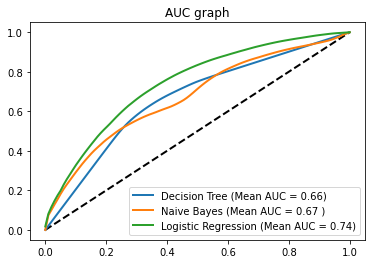

In [ ]:
meanTPRlog = np.mean(trueposLOG, axis=0)
meanAUC = metrics.auc(meanFPR, meanTPR)
    
plt.plot([0,1],[0,1],'r--',lw=2,color='black')
plt.plot(meanFPR, meanTPR, label='Decision Tree 'r'(Mean AUC = %0.2f)' % (meanAUC),lw=2,alpha=1)
plt.plot(meanFPRNB, meanTPRNB, label='Naive Bayes'+r' (Mean AUC = %0.2f )' % (meanAUCNB),lw=2, alpha=1)
plt.plot(mean_fpr, meanTPRlog, label = 'Logistic Regression 'r'(Mean AUC = %0.2f)' % (meanaucLOG),lw=2,alpha=1)
plt.title('AUC graph')
plt.legend()
plt.show()

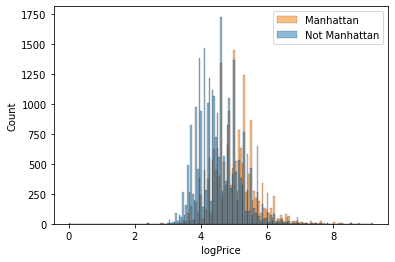

In [ ]:
nycData['Manhattan']=nycData['neighbourhood_group']=='Manhattan'

sns.histplot(nycData,x='logPrice',hue='Manhattan')
plt.legend(labels=['Manhattan', 'Not Manhattan']);

In [ ]:
# extra credit

In [ ]:
nycData['Manhattan']=nycData['neighbourhood_group']=='Manhattan'

In [ ]:
nycData

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,logPrice,Manhattan
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.21,6,365,5.010635,False
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,5.420535,True
2,Manhattan,40.80902,-73.94190,Private room,3,0,NaN,1,365,5.017280,True
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,4.499810,False
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,4.394449,True
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,2,0,NaN,2,9,4.262680,False
48891,Brooklyn,40.70184,-73.93317,Private room,4,0,NaN,2,36,3.713572,False
48892,Manhattan,40.81475,-73.94867,Entire home/apt,10,0,NaN,1,27,4.753590,True
48893,Manhattan,40.75751,-73.99112,Shared room,1,0,NaN,6,2,4.025352,True


**Extra Credit**

In [ ]:
from scipy.stats import chisquare

In [ ]:
yeslist=[]
falist=[]
for i in range(len(nycData)):
  if nycData["Manhattan"][i]==True:
    yeslist.append(nycData["calculated_host_listings_count"][i])
  else:
    falist.append(nycData["calculated_host_listings_count"][i])

In [ ]:
falist

[6,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 6,
 6,
 6,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 6,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 6,
 2,
 1,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 4,
 5,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 2,
 2,
 5,
 1,
 1,
 4,
 3,
 1,
 3,
 2,
 1,
 5,
 5,
 5,
 2,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 6,
 6,
 6,
 3,
 2,
 6,
 1,
 2,
 2,
 7,
 13,
 2,
 4,
 4,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 3,
 28,
 1,
 1,
 6,
 28,
 28,
 2,
 28,
 2,
 2,
 1,
 1,
 1,
 1,
 28,
 1,
 5,
 3,
 4,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 28,
 1,
 5,
 1,
 3,
 1,
 2,
 2,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 3,
 

In [ ]:
obs = np.array([yeslist, falist],dtype=object)

In [ ]:
obs.shape

(2,)

In [ ]:
chisquare(yeslist)

Power_divergenceResult(statistic=3939699.519404634, pvalue=0.0)

In [ ]:
chisquare(falist)

Power_divergenceResult(statistic=549783.1793664858, pvalue=0.0)